In [2]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns
import urllib2 #To load data
from scipy.stats import ttest_ind #t_tests
import statsmodels.formula.api as smf # Linear modeling
import matplotlib.pyplot as plt #plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('parent.edu.income.csv')
df1 = pd.read_csv('immigrant.edu.income.csv')

In [4]:
lm = smf.ols(formula='mi~english', data=df).fit()
lm_mult = smf.ols(formula='mi~ea + english + work', data=df).fit()

df['preds'] = lm.predict()
df['mult_preds'] = lm_mult.predict()

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     455.3
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           4.09e-92
Time:                        13:36:01   Log-Likelihood:                -20077.
No. Observations:                2244   AIC:                         4.016e+04
Df Residuals:                    2242   BIC:                         4.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -895.3105    118.727     -7.541      0.000     -1128.138  -662.483
english      857.3989     40.184     21.337      0.000       778.597   936.201
==============================================================================
Omnibus:                     1872.335   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71257.565
Skew:                           3.716   Prob(JB):                         0.00
Kurtosis:                      29.587   Cond. No.                         9.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

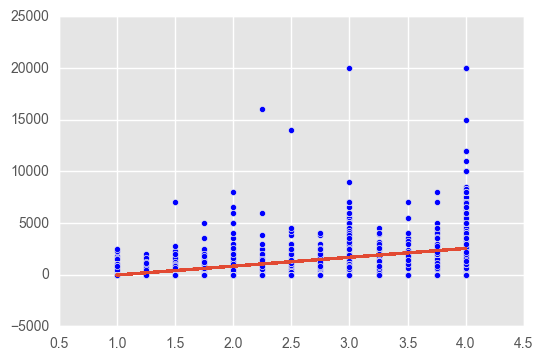

In [6]:
plt.scatter(df.english, df.mi)
plt.plot(df.english, df.preds)
plt.show()

In [8]:
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     378.7
Date:                Mon, 06 Mar 2017   Prob (F-statistic):          6.07e-199
Time:                        13:36:17   Log-Likelihood:                -19824.
No. Observations:                2244   AIC:                         3.966e+04
Df Residuals:                    2240   BIC:                         3.968e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    742.7010    136.836      5.428      0.000       474.362  1011.040
ea           150.2870     13.994     10.740      0.000       122.845   177.729
english      250.0241     46.759      5.347      0.000       158.329   341.720
work        -272.7578     14.111    -19.330      0.000      -300.429  -245.086
==============================================================================
Omnibus:                     2156.756   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126662.891
Skew:                           4.495   Prob(JB):                         0.00
Kurtosis:                      38.691   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

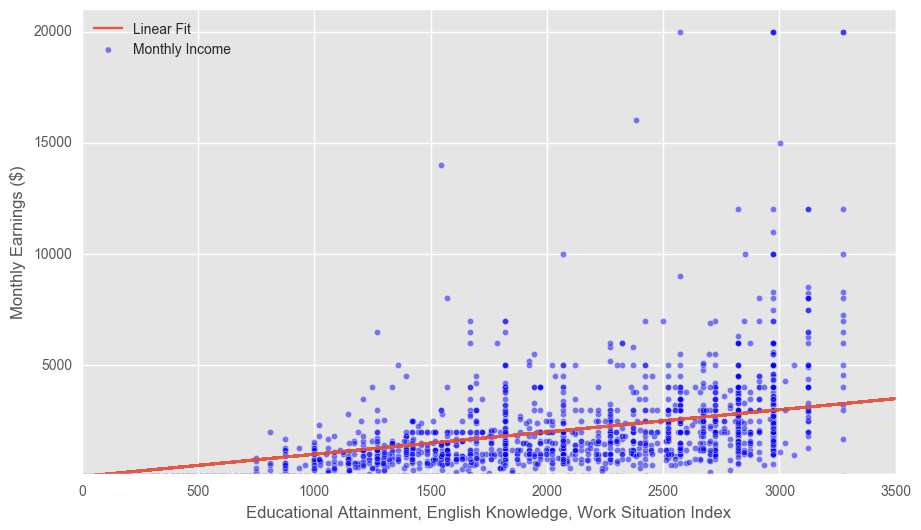

In [19]:
fig, ax = plt.subplots(figsize=(10.5,6))
ax.scatter(df.mult_preds, df.mi, label='Monthly Income', alpha=0.5)
ax.plot(df.mi, df.mi, label='Linear Fit', alpha=0.9)
ax.set_xlabel('Educational Attainment, English Knowledge, Work Situation Index')
ax.set_ylabel('Monthly Earnings ($)')
ax.legend(numpoints=1, loc='upper left')
plt.xlim([0, 3500])
plt.ylim([100, 21000])
plt.show()